In [3]:
import pandas as pd
import os

# Ruta completa al archivo
ruta_completa = r'C:\Users\diego\OneDrive\Desktop\ebac\Entregable 3\datos_consolidados.csv'

try:
    # Leer el archivo CSV
    df = pd.read_csv(ruta_completa)
    
    # Mostrar dimensiones del dataset
    print("Dimensiones del dataset:", df.shape)
    
    # Mostrar información adicional útil
    print("\nPrimeras 5 filas del dataset:")
    print(df.head())
    
    print("\nInformación del dataset:")
    print(df.info())
    
    print("\nEstadísticas descriptivas:")
    print(df.describe())
    
except FileNotFoundError:
    print(f"Error: El archivo 'datos_consolidados.csv' no se encuentra en la ruta:")
    print(ruta_completa)
    print("\nArchivos disponibles en el directorio:")
    directorio = r'C:\Users\diego\OneDrive\Desktop\ebac\Entregable 3'
    try:
        archivos = os.listdir(directorio)
        for archivo in archivos:
            print(f"  - {archivo}")
    except FileNotFoundError:
        print("El directorio tampoco existe. Verifica la ruta.")

except Exception as e:
    print(f"Error al leer el archivo: {e}")

Dimensiones del dataset: (122002, 27)

Primeras 5 filas del dataset:
    WEEK         ITEM_CODE  TOTAL_UNIT_SALES  TOTAL_VALUE_SALES  \
0  34-22  7501058792808BP2             0.006              0.139   
1  34-22     7501058715883             0.487            116.519   
2  34-22     7702626213774             1.391             68.453   
3  34-22     7501058716422             0.022              1.481   
4  34-22     7501058784353             2.037            182.839   

   TOTAL_UNIT_AVG_WEEKLY_SALES              REGION MANUFACTURER   BRAND  \
0                        1.000  TOTAL AUTOS AREA 5      RECKITT  VANISH   
1                        2.916  TOTAL AUTOS AREA 5      RECKITT  VANISH   
2                        5.171  TOTAL AUTOS AREA 5      RECKITT  VANISH   
3                        1.833  TOTAL AUTOS AREA 5      RECKITT  VANISH   
4                        5.375  TOTAL AUTOS AREA 5      RECKITT  VANISH   

               ITEM                                   ITEM_DESCRIPTION  ...  

Analizando ventas: TOTAL_UNIT_SALES
Usando categorías: ['REGION', 'CATEGORY', 'ID_CATEGORY', 'CATEGORIA_AGRUPADA']


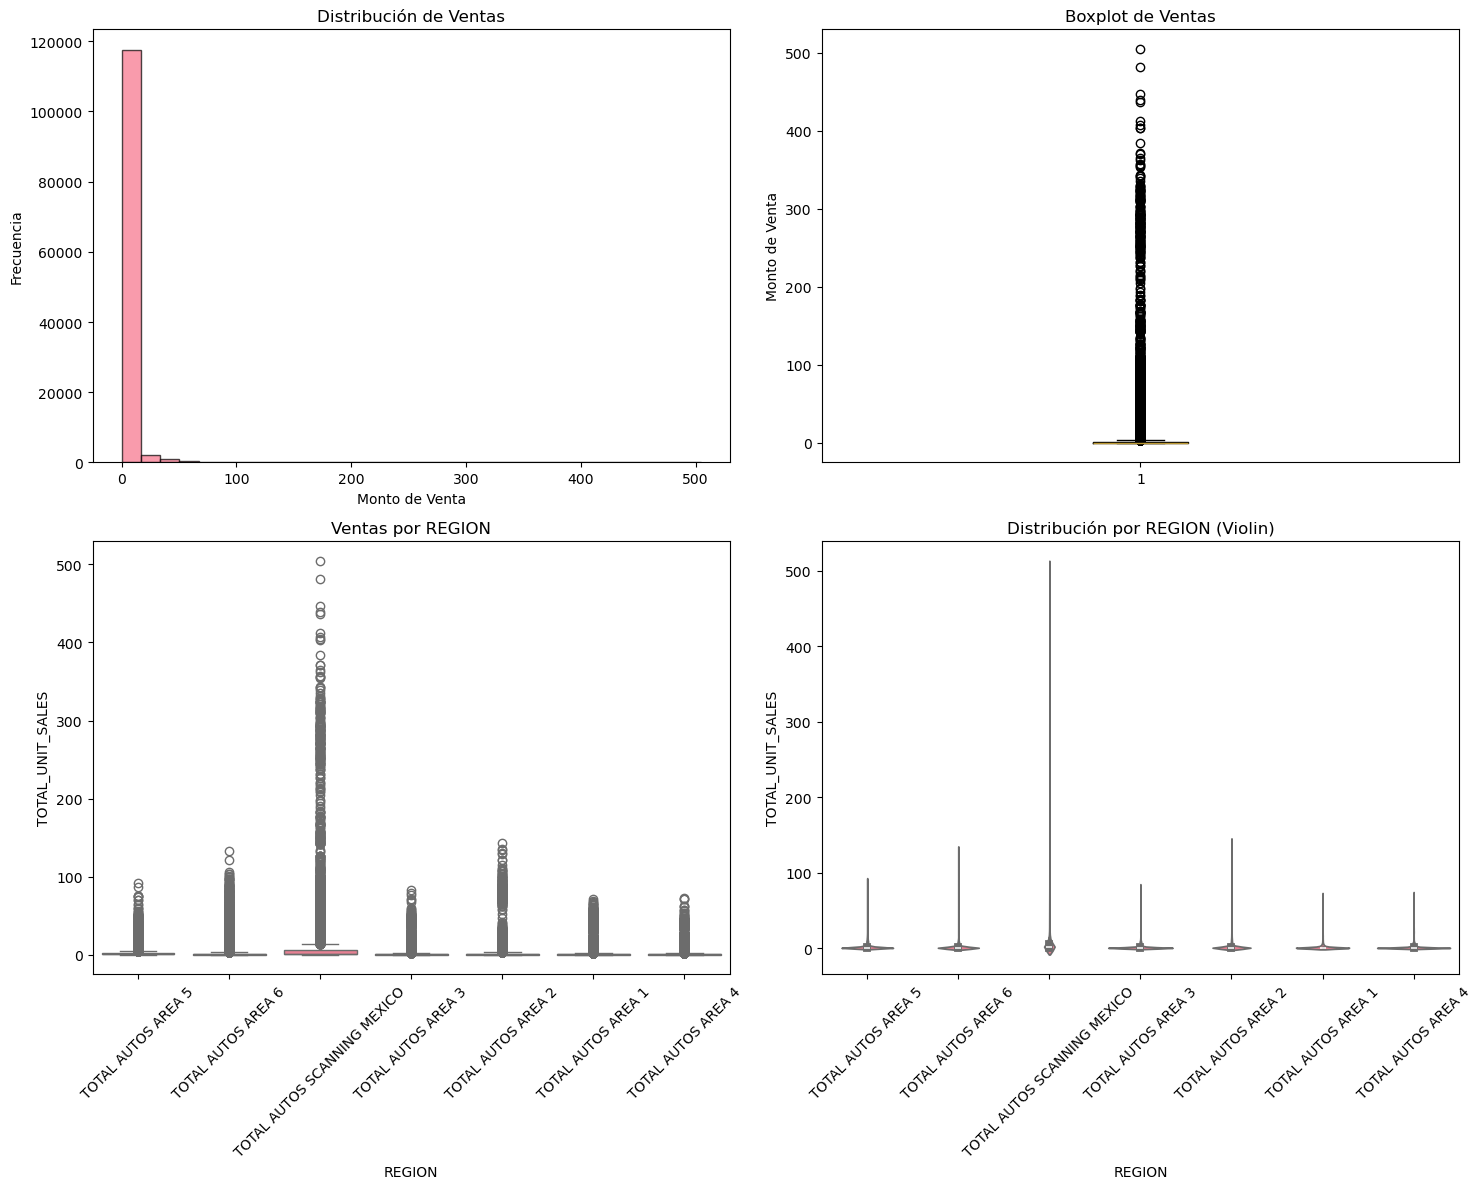


DETECCIÓN DE OUTLIERS:
Límite superior para outliers: 3.71
Número de outliers detectados: 17625
Porcentaje de outliers: 14.45%


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# Leer los datos
ruta = r'C:\Users\diego\OneDrive\Desktop\ebac\Entregable 3\datos_consolidados.csv'
df = pd.read_csv(ruta)

# Identificar columnas de ventas y categorías
ventas_cols = [col for col in df.columns if any(x in col.lower() for x in 
              ['venta', 'sales', 'monto', 'amount', 'precio', 'price', 'total', 'revenue'])]

categoria_cols = [col for col in df.columns if any(x in col.lower() for x in 
                 ['categoria', 'category', 'producto', 'product', 'tipo', 'type', 'region'])]

# Si no se identifican, usar las primeras columnas apropiadas
if not ventas_cols:
    ventas_cols = df.select_dtypes(include='number').columns.tolist()[:1]

if not categoria_cols:
    categoria_cols = df.select_dtypes(include='object').columns.tolist()[:2]

print(f"Analizando ventas: {ventas_cols[0]}")
print(f"Usando categorías: {categoria_cols}")

# Crear gráficos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Histograma de distribución de ventas
axes[0,0].hist(df[ventas_cols[0]].dropna(), bins=30, alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribución de Ventas')
axes[0,0].set_xlabel('Monto de Venta')
axes[0,0].set_ylabel('Frecuencia')

# 2. Boxplot general de ventas
axes[0,1].boxplot(df[ventas_cols[0]].dropna())
axes[0,1].set_title('Boxplot de Ventas')
axes[0,1].set_ylabel('Monto de Venta')

# 3. Boxplot por primera categoría (si existe)
if categoria_cols and df[categoria_cols[0]].nunique() <= 10:
    df_boxplot = df.dropna(subset=[ventas_cols[0], categoria_cols[0]])
    sns.boxplot(x=categoria_cols[0], y=ventas_cols[0], data=df_boxplot, ax=axes[1,0])
    axes[1,0].set_title(f'Ventas por {categoria_cols[0]}')
    axes[1,0].tick_params(axis='x', rotation=45)
else:
    axes[1,0].text(0.5, 0.5, 'No hay categorías adecuadas\npara boxplot', 
                  ha='center', va='center', transform=axes[1,0].transAxes)
    axes[1,0].set_title('Boxplot por Categoría')

# 4. Violin plot por categoría (alternativa)
if categoria_cols and df[categoria_cols[0]].nunique() <= 10:
    sns.violinplot(x=categoria_cols[0], y=ventas_cols[0], data=df_boxplot, ax=axes[1,1])
    axes[1,1].set_title(f'Distribución por {categoria_cols[0]} (Violin)')
    axes[1,1].tick_params(axis='x', rotation=45)
else:
    axes[1,1].text(0.5, 0.5, 'No hay categorías adecuadas\npara violin plot', 
                  ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('Distribución por Categoría')

plt.tight_layout()
plt.savefig('distribucion_ventas.png', dpi=300, bbox_inches='tight')
plt.show()

# Mostrar estadísticas de outliers
print("\nDETECCIÓN DE OUTLIERS:")
q1 = df[ventas_cols[0]].quantile(0.25)
q3 = df[ventas_cols[0]].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

outliers = df[df[ventas_cols[0]] > limite_superior]
print(f"Límite superior para outliers: {limite_superior:.2f}")
print(f"Número de outliers detectados: {len(outliers)}")
print(f"Porcentaje de outliers: {(len(outliers)/len(df))*100:.2f}%")

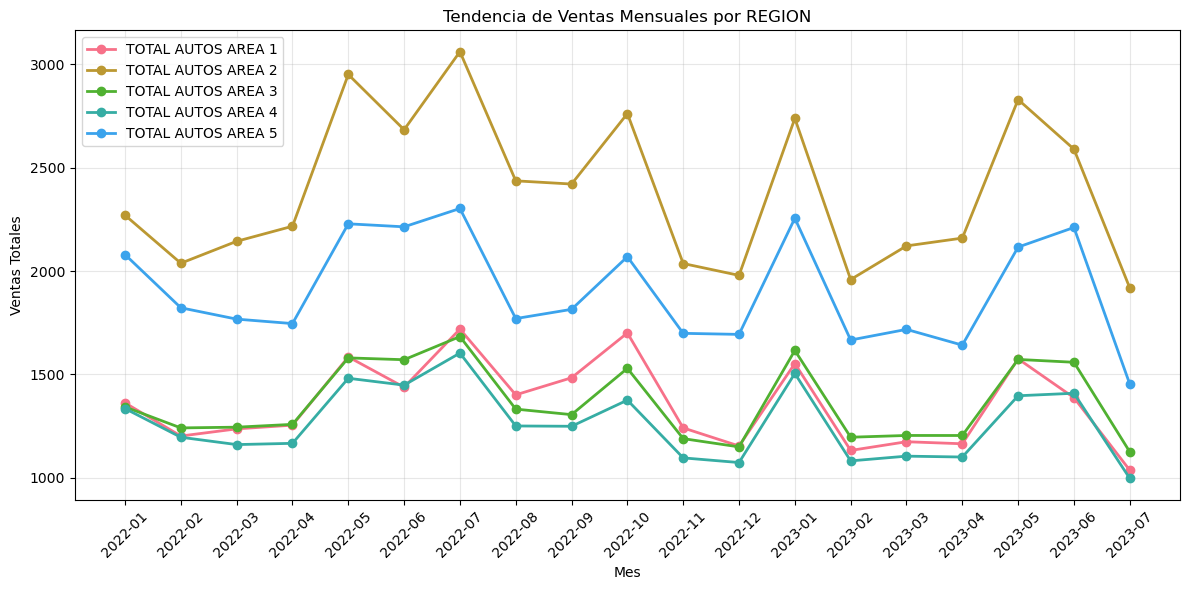

RESUMEN DE TENDENCIAS:
Período analizado: 2022-01 a 2023-07
Categorías analizadas: 7


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv(r'C:\Users\diego\OneDrive\Desktop\ebac\Entregable 3\datos_consolidados.csv')

# Identificar columnas automáticamente
fecha_col = [col for col in df.columns if any(x in col.lower() for x in ['fecha', 'date', 'time'])][0]
venta_col = [col for col in df.columns if any(x in col.lower() for x in ['venta', 'sales', 'monto'])][0]
categoria_col = [col for col in df.columns if any(x in col.lower() for x in ['producto', 'categoria', 'region'])][0]

# Convertir fecha a datetime
df[fecha_col] = pd.to_datetime(df[fecha_col])

# Agrupar ventas por mes y categoría
df['mes'] = df[fecha_col].dt.to_period('M')
ventas_mensuales = df.groupby(['mes', categoria_col])[venta_col].sum().reset_index()

# Crear gráfico de tendencias
plt.figure(figsize=(12, 6))

for categoria in ventas_mensuales[categoria_col].unique()[:5]:  # Mostrar máximo 5 categorías
    datos_categoria = ventas_mensuales[ventas_mensuales[categoria_col] == categoria]
    plt.plot(datos_categoria['mes'].astype(str), datos_categoria[venta_col], 
             marker='o', label=categoria, linewidth=2)

plt.title(f'Tendencia de Ventas Mensuales por {categoria_col}')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar resumen
print("RESUMEN DE TENDENCIAS:")
print(f"Período analizado: {df['mes'].min()} a {df['mes'].max()}")
print(f"Categorías analizadas: {ventas_mensuales[categoria_col].nunique()}")

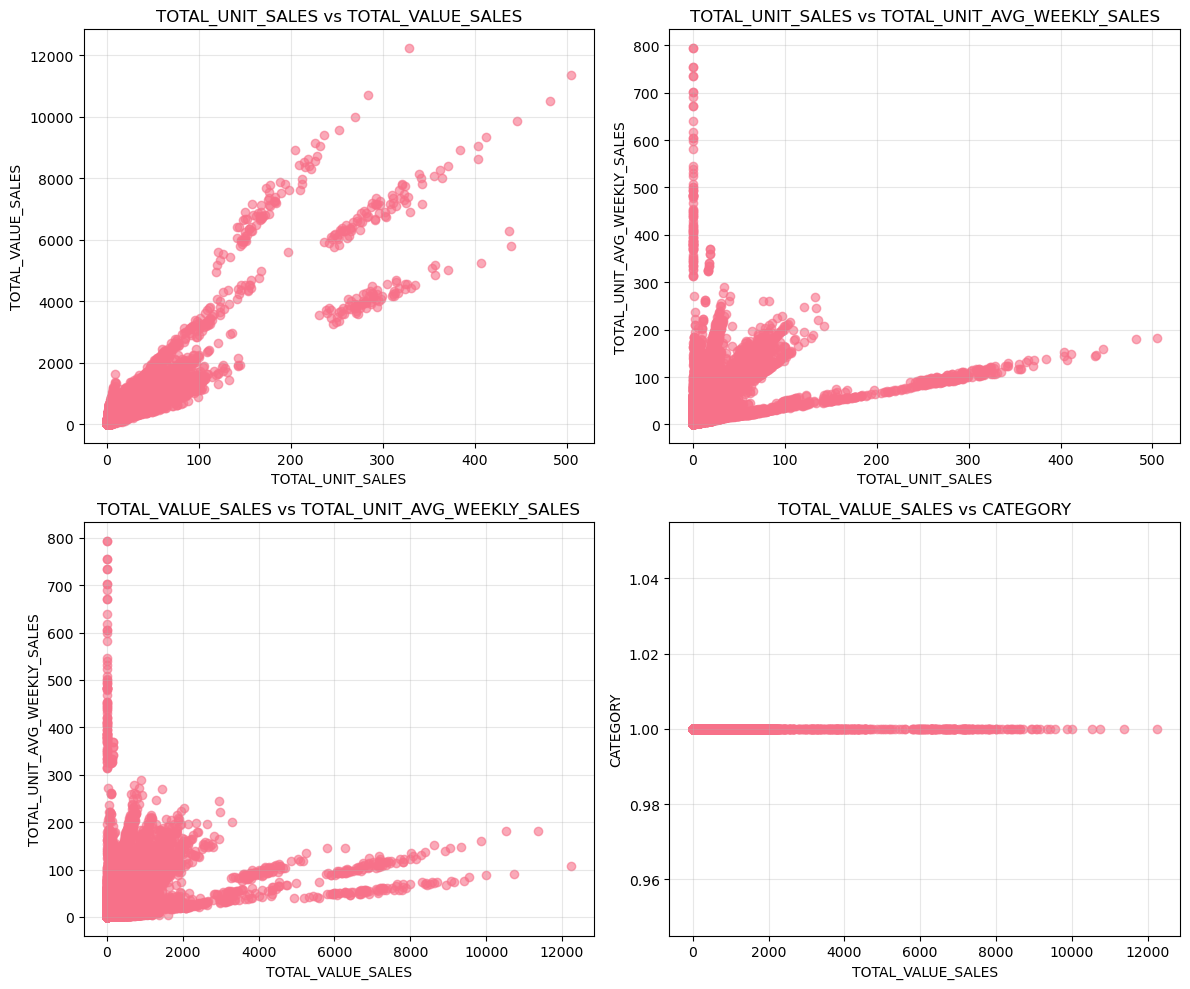

MATRIZ DE CORRELACIONES:
                             TOTAL_UNIT_SALES  TOTAL_VALUE_SALES  \
TOTAL_UNIT_SALES                         1.00               0.92   
TOTAL_VALUE_SALES                        0.92               1.00   
TOTAL_UNIT_AVG_WEEKLY_SALES              0.43               0.37   
CATEGORY                                  NaN                NaN   

                             TOTAL_UNIT_AVG_WEEKLY_SALES  CATEGORY  
TOTAL_UNIT_SALES                                    0.43       NaN  
TOTAL_VALUE_SALES                                   0.37       NaN  
TOTAL_UNIT_AVG_WEEKLY_SALES                         1.00       NaN  
CATEGORY                                             NaN       NaN  


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv(r'C:\Users\diego\OneDrive\Desktop\ebac\Entregable 3\datos_consolidados.csv')

# Identificar columnas numéricas automáticamente
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Tomar las primeras 4 variables numéricas para análisis
variables = numeric_cols[:4]

# Crear scatter plots entre pares de variables
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

pares = [(variables[0], variables[1]), 
         (variables[0], variables[2]),
         (variables[1], variables[2]),
         (variables[1], variables[3])]

for i, (x_var, y_var) in enumerate(pares):
    axes[i].scatter(df[x_var], df[y_var], alpha=0.6)
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)
    axes[i].set_title(f'{x_var} vs {y_var}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calcular y mostrar correlaciones
print("MATRIZ DE CORRELACIONES:")
correlaciones = df[variables].corr()
print(correlaciones.round(2))

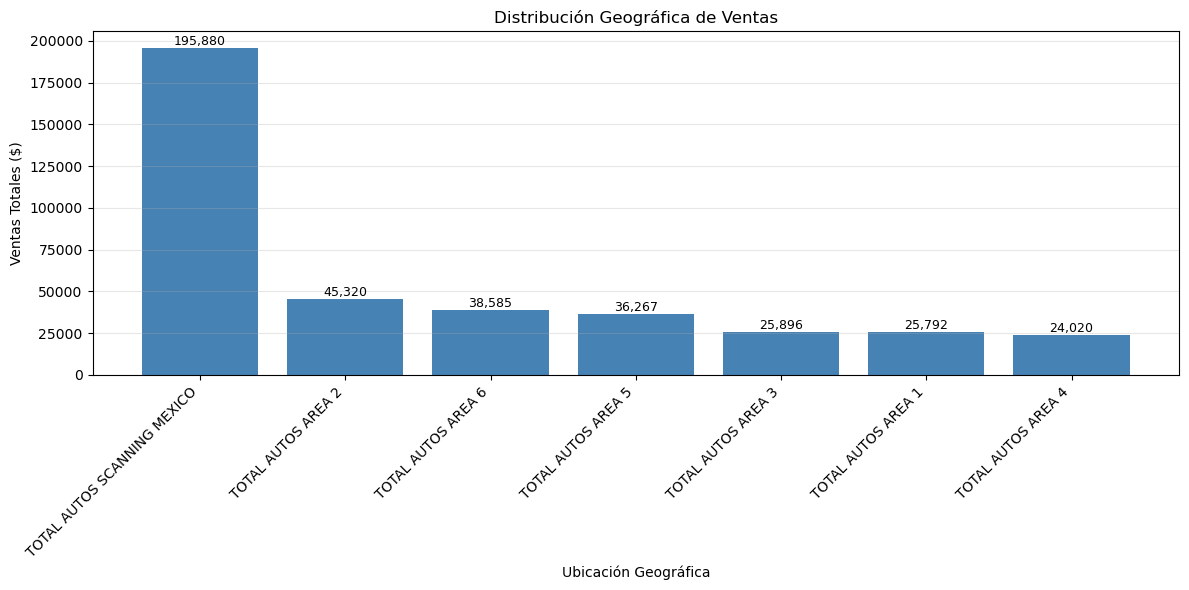

DISTRIBUCIÓN GEOGRÁFICA DE VENTAS:
 1. TOTAL AUTOS SCANNING MEXICO:    195,880 ( 50.0%)
 2. TOTAL AUTOS AREA 2  :     45,320 ( 11.6%)
 3. TOTAL AUTOS AREA 6  :     38,585 (  9.8%)
 4. TOTAL AUTOS AREA 5  :     36,267 (  9.3%)
 5. TOTAL AUTOS AREA 3  :     25,896 (  6.6%)
 6. TOTAL AUTOS AREA 1  :     25,792 (  6.6%)
 7. TOTAL AUTOS AREA 4  :     24,020 (  6.1%)

Total general: 391,760
Región con mayor ventas: TOTAL AUTOS SCANNING MEXICO (195,880)
Región con menor ventas: TOTAL AUTOS AREA 4 (24,020)


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv(r'C:\Users\diego\OneDrive\Desktop\ebac\Entregable 3\datos_consolidados.csv')

# Identificar columnas automáticamente
venta_col = [col for col in df.columns if any(x in col.lower() for x in ['venta', 'sales', 'monto'])][0]
region_col = [col for col in df.columns if any(x in col.lower() for x in ['region', 'pais', 'ciudad', 'zona', 'estado', 'country', 'state', 'city'])][0]

# Calcular ventas por región
ventas_region = df.groupby(region_col)[venta_col].sum().sort_values(ascending=False)

# Crear gráfico de barras con etiquetas específicas
plt.figure(figsize=(12, 6))
bars = plt.bar(ventas_region.index.astype(str), ventas_region.values, color='steelblue')

plt.title('Distribución Geográfica de Ventas')
plt.xlabel('Ubicación Geográfica')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Mostrar resumen detallado
print("DISTRIBUCIÓN GEOGRÁFICA DE VENTAS:")
print("=" * 40)
for i, (region, ventas) in enumerate(ventas_region.items(), 1):
    porcentaje = (ventas / ventas_region.sum()) * 100
    print(f"{i:2d}. {region:20s}: {ventas:10,.0f} ({porcentaje:5.1f}%)")

print(f"\nTotal general: {ventas_region.sum():,.0f}")
print(f"Región con mayor ventas: {ventas_region.index[0]} ({ventas_region.iloc[0]:,.0f})")
print(f"Región con menor ventas: {ventas_region.index[-1]} ({ventas_region.iloc[-1]:,.0f})")


<Figure size 1200x600 with 0 Axes>

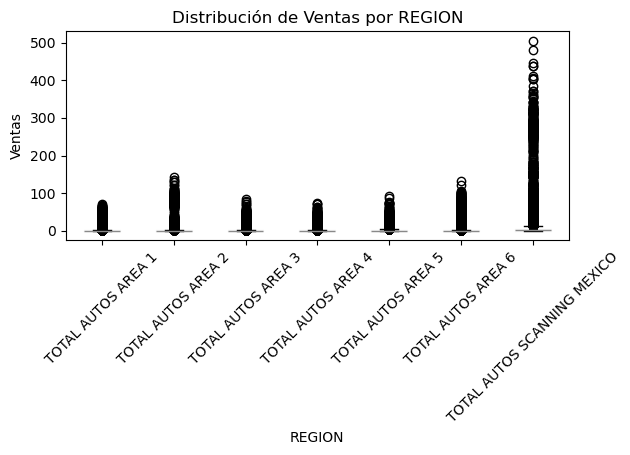

DETECCIÓN DE OUTLIERS:
Límite superior para outliers: 4
Número de outliers detectados: 17625
Porcentaje de outliers: 14.4%

Outliers por REGION:
  - TOTAL AUTOS AREA 1: 1312 outliers
  - TOTAL AUTOS AREA 2: 2372 outliers
  - TOTAL AUTOS AREA 3: 1642 outliers
  - TOTAL AUTOS AREA 4: 1533 outliers
  - TOTAL AUTOS AREA 5: 2079 outliers
  - TOTAL AUTOS AREA 6: 1926 outliers
  - TOTAL AUTOS SCANNING MEXICO: 6761 outliers


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv(r'C:\Users\diego\OneDrive\Desktop\ebac\Entregable 3\datos_consolidados.csv')

# Identificar columnas automáticamente
venta_col = [col for col in df.columns if any(x in col.lower() for x in ['venta', 'sales', 'monto'])][0]
categoria_col = [col for col in df.columns if any(x in col.lower() for x in ['producto', 'categoria', 'region'])][0]

# Crear boxplot por categoría
plt.figure(figsize=(12, 6))
df.boxplot(column=venta_col, by=categoria_col, grid=False)
plt.title(f'Distribución de Ventas por {categoria_col}')
plt.suptitle('')  # Eliminar título automático
plt.xlabel(categoria_col)
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calcular y mostrar outliers
print("DETECCIÓN DE OUTLIERS:")
print("=" * 30)

q1 = df[venta_col].quantile(0.25)
q3 = df[venta_col].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

outliers = df[df[venta_col] > limite_superior]
print(f"Límite superior para outliers: {limite_superior:,.0f}")
print(f"Número de outliers detectados: {len(outliers)}")
print(f"Porcentaje de outliers: {(len(outliers)/len(df))*100:.1f}%")

# Mostrar outliers por categoría
if len(outliers) > 0:
    print(f"\nOutliers por {categoria_col}:")
    outliers_por_categoria = outliers.groupby(categoria_col).size()
    for categoria, count in outliers_por_categoria.items():
        print(f"  - {categoria}: {count} outliers")